# INF552:Homework4
### 1. The LASSO and Boosting for Regression
##### &nbsp; (a) Download the Communities and Crime data1 from https://archive.ics.uci.edu/ml/datasets/Communities+and+Crime. Use the first 1495 rows of data as the training set and the rest as the test set.
##### &nbsp; (b) The data set has missing values. Use a data imputation technique to deal with the missing values in the data set. The data description mentions some features are nonpredictive. Ignore those features.

In [56]:
import numpy as np
from sklearn.preprocessing import Imputer
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#read csv 
data = pd.read_csv('communities.csv', sep = ',', header = None)

#delete nonpredictive features
data_pre = data.drop([0,1,2,3,4], axis=1)

#use Nan to replace all the missing data first
data_pre = data_pre.replace(['?'], np.nan)

#use sklearn.processing.imputer to replace Nan with mean of each features
fill_NaN = Imputer(missing_values=np.nan, strategy='mean', axis=0)
mean_imputer = fill_NaN.fit(data_pre)
imputed_arr = mean_imputer.transform(data_pre.values)

#transform array to dataframe
imputed_df=pd.DataFrame(imputed_arr)
print(imputed_df)


       0     1     2     3     4     5     6     7     8     9    ...    113  \
0     0.19  0.33  0.02  0.90  0.12  0.17  0.34  0.47  0.29  0.32  ...   0.12   
1     0.00  0.16  0.12  0.74  0.45  0.07  0.26  0.59  0.35  0.27  ...   0.02   
2     0.00  0.42  0.49  0.56  0.17  0.04  0.39  0.47  0.28  0.32  ...   0.01   
3     0.04  0.77  1.00  0.08  0.12  0.10  0.51  0.50  0.34  0.21  ...   0.02   
4     0.01  0.55  0.02  0.95  0.09  0.05  0.38  0.38  0.23  0.36  ...   0.04   
5     0.02  0.28  0.06  0.54  1.00  0.25  0.31  0.48  0.27  0.37  ...   0.01   
6     0.01  0.39  0.00  0.98  0.06  0.02  0.30  0.37  0.23  0.60  ...   0.05   
7     0.01  0.74  0.03  0.46  0.20  1.00  0.52  0.55  0.36  0.35  ...   0.01   
8     0.03  0.34  0.20  0.84  0.02  0.00  0.38  0.45  0.28  0.48  ...   0.04   
9     0.01  0.40  0.06  0.87  0.30  0.03  0.90  0.82  0.80  0.39  ...   0.00   
10    0.13  0.71  0.15  0.07  1.00  0.41  0.40  0.52  0.35  0.33  ...   0.02   
11    0.02  0.46  0.08  0.91  0.07  0.10

##### &nbsp; (c) Plot a correlation matrix for the features in the data set.

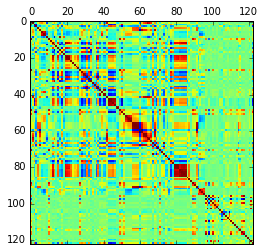

In [43]:
plt.matshow(imputed_df.corr())

##### &nbsp; (d)Calculate the Coefficient of Variation CV for each feature, where CV = s/m, in which s is sample variance and m is sample mean..

In [57]:
cv_list = []
for i in range(0,123,1):
    var = np.var(imputed_df[i])
    mean = np.mean(imputed_df[i])
    cv = var/mean
    cv_list.append(cv)
print(cv_list)

[0.2794970858238236, 0.05781183601236022, 0.35740724042696437, 0.07897582911819041, 0.2837559755365809, 0.37511784605156023, 0.056748311882888106, 0.041711961692117425, 0.08240513228100615, 0.07583656128436968, 0.2566071822229374, 0.2840242011580325, 0.12131774754326263, 0.059912313493095615, 0.14280979516405798, 0.06393798940325607, 0.06394856352246771, 0.15520249037177047, 0.05855745130370275, 0.10457393673478088, 0.10422290180966735, 0.09476530703995278, 0.10109827674080851, 0.13334926055180765, 0.11839746377500153, 0.1280023336675518, 0.08672931679333803, 0.2947518830434152, 0.17217858240162304, 0.14407347718057287, 0.10692852695928623, 0.12093680553571748, 0.11237769649307731, 0.06041726215538387, 0.10328246781869392, 0.06983642344710998, 0.10109346781531632, 0.0785954170022307, 0.07214208187996284, 0.07080809668993171, 0.06290215422602141, 0.06816980416278784, 0.048974767491138244, 0.06674209717160569, 0.06857314568484231, 0.07202554373288415, 0.06288824370156768, 0.0566669447480

##### &nbsp; Pick 11 features with highest cv, and make scatter plots and box plots for them. Can you draw conclusions about significance of those features, just by the scatter plots?

In [58]:
top_11_idx = np.argsort(cv_list)[-11:]
print(top_11_idx)
top_11_values = [cv_list[i] for i in top_11_idx]
print(top_11_values)


[ 58  56  57  61 115  49   2  89   5  90 120]
[0.30316564011870567, 0.3063988764213265, 0.30651939682910784, 0.32041966726769644, 0.32433293490894666, 0.32521917625197744, 0.35740724042696437, 0.35745435967185313, 0.37511784605156023, 0.4423119335991046, 0.6137947028672536]


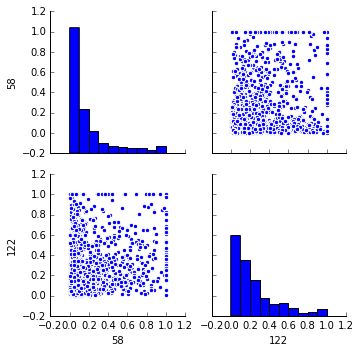

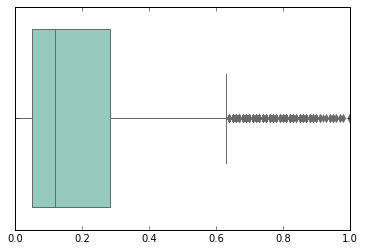

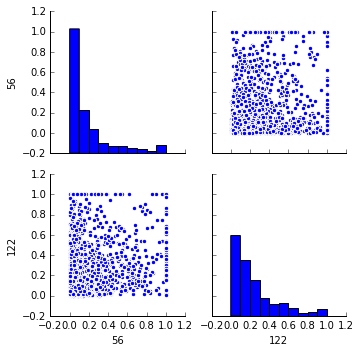

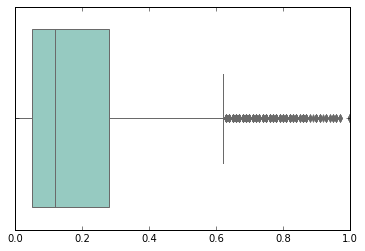

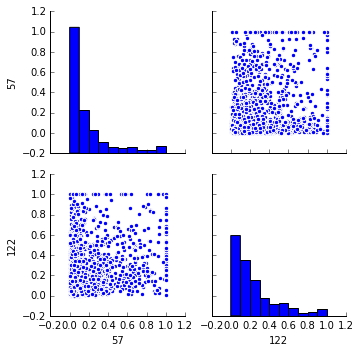

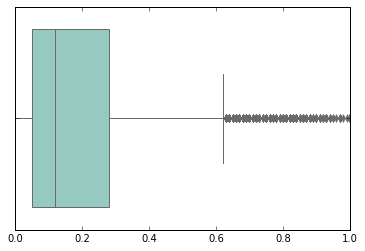

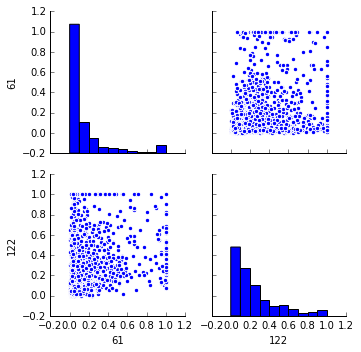

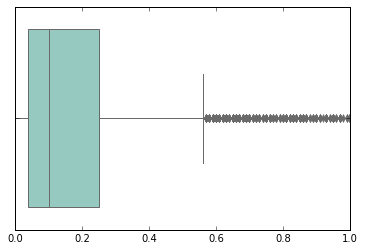

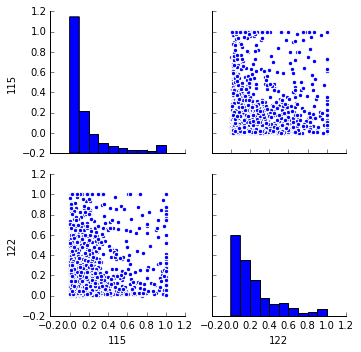

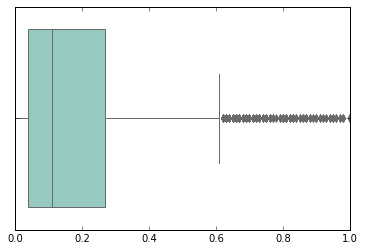

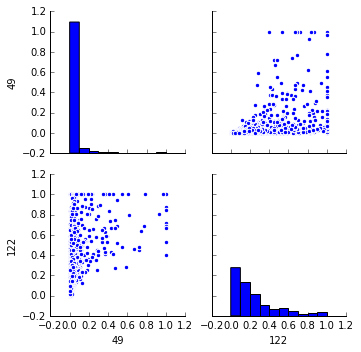

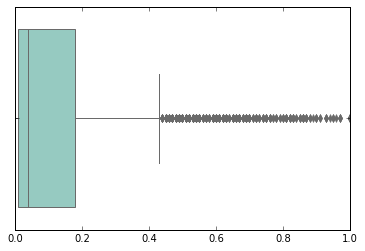

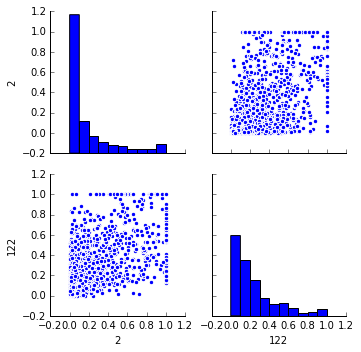

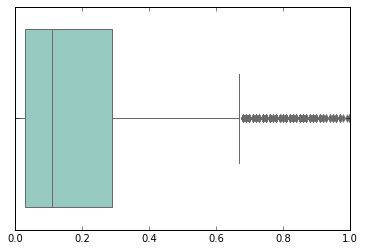

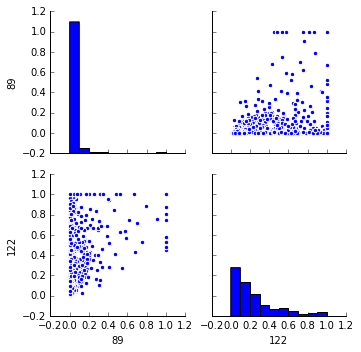

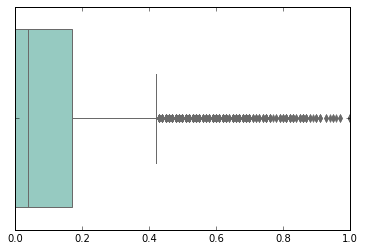

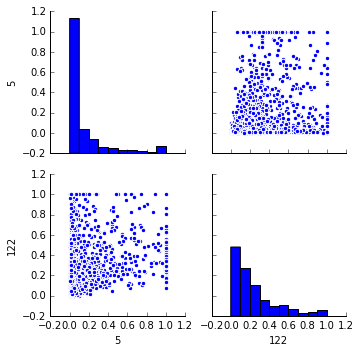

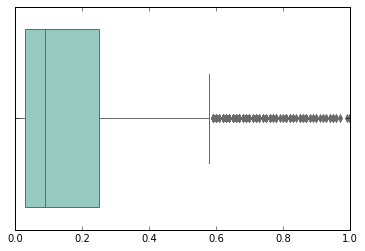

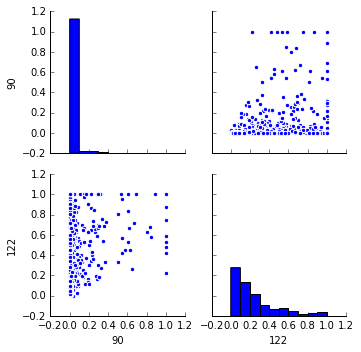

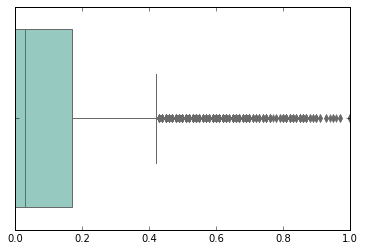

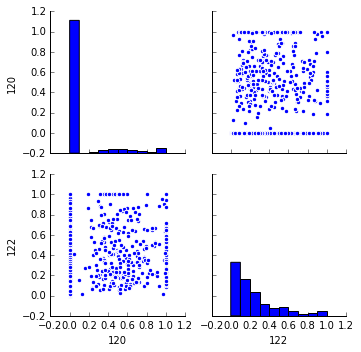

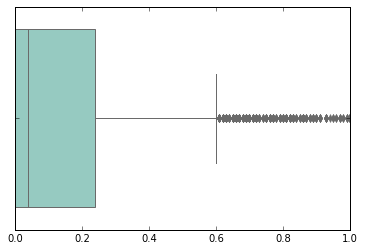

In [23]:
for i in top_11_idx:
    data_df = pd.concat( [imputed_df[i], imputed_df[122]], axis=1,ignore_index=False)
    sns.pairplot(data_df, kind="scatter", palette="Set2")
    plt.show()
    sns.boxplot(data_df,palette="Set3")
    plt.show()



##### &nbsp;(f) Fit a linear model using least squares to the training set and report the test error.

In [3]:
from sklearn.linear_model import LinearRegression

#split data into train dataset and test dataset
train_data = imputed_df.iloc[:1495]
train_x = train_data[list(range(0,122,1))]
train_y = train_data[list(range(122,123,1))]
test_data = imputed_df.iloc[1495:]
test_x = test_data[list(range(0,122,1))]
test_y = test_data[list(range(122,123,1))]
train_y_list = train_y[122].values.tolist()
test_y_list = test_y[122].values.tolist()

#fit a linear model
reg = LinearRegression().fit(train_x, train_y)

test_pre = reg.predict(test_x)
test_error = 0
for i in range(0,len(test_y),1):
    if test_pre[i]!=test_y_list[i]:
        test_error+=1
print('The test error is:')
print(test_error)
print('The R^2 of this model is:')
print(reg.score(test_x,test_y))

The test error is:
499
The R^2 of this model is:
-15.60646695064332


##### &nbsp;(g) Fit a ridge regression model on the training set, with λ chosen by cross-validation. Report the test error obtained.

In [92]:
from sklearn.linear_model import RidgeCV
clf = RidgeCV(alphas=[1e-3, 1e-2, 1e-1, 1,10,100],cv = 5).fit(train_x, train_y)
ridge_pre = clf.predict(test_x)
test_error_r = 0
for i in range(0,len(test_y),1):
    if ridge_pre[i]!=test_y_list[i]:
        test_error_r+=1
print('The test error is:')
print(test_error_r)
print('The R^2 of this model is:')
print(clf.score(test_x,test_y))

The test error is:
499
The R^2 of this model is:
0.627021995706937


##### &nbsp;(h) Fit a LASSO model on the training set, with λ chosen by cross-validation. Report the test error obtained, along with a list of the variables selected by the model. Repeat with normalized features. Report the test error for both cases and compare them.

In [93]:
from sklearn.linear_model import LassoCV
#without normalized features
la1 = LassoCV(alphas=[1e-3, 1e-2, 1e-1, 1,10,100],cv = 5).fit(train_x, np.ravel(train_y))
la1_pre = la1.predict(test_x)
test_error_la1 = 0
for i in range(0,len(test_y),1):
    if la1_pre[i]!=test_y_list[i]:
        test_error_la1+=1
print('The test error without normalization is:')
print(test_error_la1)
coef_list1 = []
count = 0
for i in la1.coef_:
    if i !=0:
        coef_list1.append(count)
    count+=1
print('The selected features are:')
print(coef_list1)
print('The R^2 of this model is:')
print(la1.score(test_x,test_y))      

la2 = LassoCV(alphas=[1e-3, 1e-2, 1e-1, 1,10,100],cv = 5,normalize=True).fit(train_x, np.ravel(train_y))
la2_pre = la2.predict(test_x)
test_error_la2 = 0
for i in range(0,len(test_y),1):
    if la2_pre[i]!=test_y_list[i]:
        test_error_la2+=1
print('The test error without normalization is:')
print(test_error_la2)
coef_list2 = []
count2 = 0
for i in la2.coef_:
    if i !=0:
        coef_list2.append(count2)
    count2+=1
print('The selected features are:')
print(coef_list2)
print('The R^2 of this model is:')
print(la2.score(test_x,test_y))

The test error without normalization is:
499
The selected features are:
[2, 3, 7, 11, 17, 24, 38, 44, 45, 48, 50, 59, 68, 71, 72, 74, 86, 88, 90, 91, 94, 119, 120]
The R^2 of this model is:
0.6310550538601054
The test error without normalization is:
499
The selected features are:
[3, 44, 50, 71]
The R^2 of this model is:
0.5841996451367093


##### &nbsp;(i) Fit a PCR model on the training set, with M (the number of principal components) chosen by cross-validation. Report the test error obtained.

In [87]:
from sklearn.preprocessing import scale 
from sklearn import model_selection
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.cross_decomposition import PLSRegression, PLSSVD
from sklearn.metrics import mean_squared_error


pca = PCA(n_components = 'mle',svd_solver = 'full')
X_reduced = pca.fit_transform(train_x)
print(train_x.shape)
print(X_reduced.shape)
print(train_y.shape)

(1495, 122)
(1495, 121)
(1495, 1)


In [97]:
#use CV to produce the best M
n_components = range(1, 122, 1)
pca = PCA(svd_solver='full')
pca_score = []
regr = LinearRegression()
for i in n_components:
    pca = PCA(n_components = i)
    X_reduced = pca.fit_transform(train_x)
    score = -1*model_selection.cross_val_score(regr, X_reduced, np.ravel(train_y), cv=5, scoring='neg_mean_squared_error').mean()
    pca_score.append(score)
best_n = pca_score.index(min(pca_score))+1
print(best_n*1)


96


In [100]:
pca_best = PCA(n_components = best_n)
X_reduced_best = pca_best.fit_transform(train_x)
test_x_best = pca_best.fit_transform(test_x)
reg1 = LinearRegression().fit(X_reduced_best, train_y)

test_pre_best = reg1.predict(test_x_best)
test_error_best = 0
for i in range(0,len(test_y),1):
    if test_pre_best[i]!=test_y_list[i]:
        test_error_best+=1
print('The test error is:')
print(test_error_best)
print('The R^2 of this model is:')
print(reg1.score(test_x_best,test_y))


The test error is:
499
The R^2 of this model is:
0.3903711993844887


##### &nbsp;(j) In this section, we would like to fit a boosting tree to the data. As in classification trees, one can use any type of regression at each node to build a multivariate regression tree. Because the number of variables is large in this problem, one can use L1-penalized regression at each node. Such a tree is called L1 penalized gradient boosting tree. You can use XGBoost2 to fit the model tree. Determine α (the regularization term) using cross-validation.


In [13]:
print(train_x)
print(train_y)

       0     1     2     3     4     5     6     7     8     9      ...     \
0     0.19  0.33  0.02  0.90  0.12  0.17  0.34  0.47  0.29  0.32    ...      
1     0.00  0.16  0.12  0.74  0.45  0.07  0.26  0.59  0.35  0.27    ...      
2     0.00  0.42  0.49  0.56  0.17  0.04  0.39  0.47  0.28  0.32    ...      
3     0.04  0.77  1.00  0.08  0.12  0.10  0.51  0.50  0.34  0.21    ...      
4     0.01  0.55  0.02  0.95  0.09  0.05  0.38  0.38  0.23  0.36    ...      
5     0.02  0.28  0.06  0.54  1.00  0.25  0.31  0.48  0.27  0.37    ...      
6     0.01  0.39  0.00  0.98  0.06  0.02  0.30  0.37  0.23  0.60    ...      
7     0.01  0.74  0.03  0.46  0.20  1.00  0.52  0.55  0.36  0.35    ...      
8     0.03  0.34  0.20  0.84  0.02  0.00  0.38  0.45  0.28  0.48    ...      
9     0.01  0.40  0.06  0.87  0.30  0.03  0.90  0.82  0.80  0.39    ...      
10    0.13  0.71  0.15  0.07  1.00  0.41  0.40  0.52  0.35  0.33    ...      
11    0.02  0.46  0.08  0.91  0.07  0.10  0.34  0.36  0.22  0.57

In [14]:

import xgboost
from sklearn import model_selection
from xgboost import XGBClassifier
alpha_list = [1e-2, 1e-1, 1,10,100]
score_xgbc_list = []
for i in alpha_list:
    xgbc = XGBClassifier(reg_alpha = i,booster = 'gbtree')
    score_xgbc = -1*model_selection.cross_val_score(xgbc, train_x, np.ravel(train_y), cv=5, scoring='neg_mean_squared_error').mean()
    score_xgbc_list.append(score_xgbc)
    print(score_xgbc)


0.03949484949832776
0.03802581939799331
0.03702107023411371
0.05489244147157191
0.11435578595317727


In [16]:
best_alpha_index = score_xgbc_list.index(min(score_xgbc_list))
print("The best alpha amomg [1e-2, 1e-1, 1,10,100] is:")
print(alpha_list[best_alpha_index])

The best alpha amomg [1e-2, 1e-1, 1,10,100] is:
1


### 2. Tree-Based Methods
##### &nbsp; (a) Download the APS Failure data from: https://archive.ics.uci.edu/ml/datasets/APS+Failure+at+Scania+Trucks . The dataset contains a training set and a test set. The training set contains 60,000 rows, of which 1,000 belong to the positive class and 171 columns, of which one is the class column. All attributes are numeric.

In [5]:
import numpy as np
from sklearn.preprocessing import Imputer
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
#load data 
train_data = pd.read_csv('aps_failure_training_set.csv', sep = ',', header = 14)
test_data = pd.read_csv('aps_failure_test_set.csv', sep = ',', header = 14)

#rename the features
column_list = []
for i in range(0,171,1):
    column_list.append(i)
train_data.columns = [column_list]
test_data.columns = [column_list]

#split data
train_data_x = train_data[list(range(1,171,1))]
train_data_y = train_data[0]
test_data_x = test_data[list(range(1,171,1))]
test_data_y = test_data[0]



In [104]:
print(train_data_x)

          1   2           3     4    5    6   7   8     9       10  ...  \
0       76698  na  2130706438   280    0    0   0   0     0       0 ...   
1       33058  na           0    na    0    0   0   0     0       0 ...   
2       41040  na         228   100    0    0   0   0     0       0 ...   
3          12   0          70    66    0   10   0   0     0     318 ...   
4       60874  na        1368   458    0    0   0   0     0       0 ...   
5       38312  na  2130706432   218    0    0   0   0     0       0 ...   
6          14   0           6    na    0    0   0   0     0       0 ...   
7      102960  na  2130706432   116    0    0   0   0     0       0 ...   
8       78696  na           0    na    0    0   0   0     0       0 ...   
9      153204   0         182    na    0    0   0   0     0   11804 ...   
10      39196  na         204   170    0    0   0   0     0       0 ...   
11      45912  na           0   454    0    0   0   0     0       0 ...   
12       2104  na        

##### &nbsp;(b) Data Preparation
&nbsp; This data set has missing values. When the number of data with missing values is significant, discarding them is not a good idea. 

&nbsp; i. Research what types of techniques are usually used for dealing with data with missing values.4 Pick at least one of them and apply it to this data in the next steps.
&nbsp;There are many ways to fill a missing data.

&nbsp;&nbsp;(1) Mean

&nbsp;&nbsp;(2) Median

&nbsp;&nbsp;(3) Most frequent value

&nbsp;For this question, I will use mean values to fill missing data

In [6]:
#use Nan to replace all the missing data first
train_data_x = train_data_x.replace(['na'], np.nan)
test_data_x = test_data_x.replace(['na'], np.nan)

#use sklearn.processing.imputer to replace Nan with mean of each features
fill_NaN = Imputer(missing_values=np.nan, strategy='mean', axis=0)
mean_imputer_train = fill_NaN.fit(train_data_x)
imputed_arr_train_x = mean_imputer_train.transform(train_data_x.values)
mean_imputer_test = fill_NaN.fit(test_data_x)
imputed_arr_test_x = mean_imputer_test.transform(test_data_x.values)

#transform array to dataframe
imputed_train_x=pd.DataFrame(imputed_arr_train_x)
imputed_test_x=pd.DataFrame(imputed_arr_test_x)

#show the first rows of imputed data_x
print(imputed_train_x[:10])
print(imputed_test_x[:10])

        0         1             2              3    4     5    6    7    8    \
0   76698.0  0.713189  2.130706e+09     280.000000  0.0   0.0  0.0  0.0  0.0   
1   33058.0  0.713189  0.000000e+00  190620.639314  0.0   0.0  0.0  0.0  0.0   
2   41040.0  0.713189  2.280000e+02     100.000000  0.0   0.0  0.0  0.0  0.0   
3      12.0  0.000000  7.000000e+01      66.000000  0.0  10.0  0.0  0.0  0.0   
4   60874.0  0.713189  1.368000e+03     458.000000  0.0   0.0  0.0  0.0  0.0   
5   38312.0  0.713189  2.130706e+09     218.000000  0.0   0.0  0.0  0.0  0.0   
6      14.0  0.000000  6.000000e+00  190620.639314  0.0   0.0  0.0  0.0  0.0   
7  102960.0  0.713189  2.130706e+09     116.000000  0.0   0.0  0.0  0.0  0.0   
8   78696.0  0.713189  0.000000e+00  190620.639314  0.0   0.0  0.0  0.0  0.0   
9  153204.0  0.000000  1.820000e+02  190620.639314  0.0   0.0  0.0  0.0  0.0   

       9    ...         160       161        162        163        164  \
0      0.0  ...   1240520.0  493384.0   72104

&nbsp; ii. For each of the 170 features, calculate the coefficient of variation CV = s/m where s is sample variance and m is sample mean.

In [4]:
#calculate CV for train_data_x
cv_list_2 = []
for i in range(0,170,1):
    var = np.var(imputed_train_x[i])
    mean = np.mean(imputed_train_x[i])
    cv = var/mean
    cv_list_2.append(cv)
print(cv_list_2)

[356434.04984931246, 3.8664488615397663, 1676046902.6862977, 6442860221.366482, 3667.400492642761, 3832.0183442680345, 1870950.0261503488, 1185353.5510552546, 2596280.660576993, 6476210.458804841, 12752506.604501767, 9496242.464443058, 9115663.040157849, 4008707.905543388, 1347325.6379167773, 5564592.017823004, 9575935.356180308, 2925566.1169150164, 2194217.4754857044, 5440219.146213651, 4868970.901670226, 7654494.788820321, 17347158.80623234, 15337032.225823818, 9397256.788088473, 3567222.3002852187, 58.357952146760006, 946437.5185736376, 2791326.8195429523, 1071226.5894362822, 37328.453258542846, 5628.119070987981, 16726109.562177438, 27802004.745328914, 16530085.725358555, 5833490.124836411, 11768972.34602357, 17173608.073407948, 9856778.636967592, 16675607.27530153, 14984048.448763764, 8161589.057420039, 683045.8619334933, 258481.08646120457, 1393022.0755391726, 4836773.385161892, 11720867.921151897, 19323534.48348076, 7856366.005386881, 4475146.456301126, 332816.7242913939, 249241

&nbsp; iii. Plot a correlation matrix for your features using pandas or any other tool.

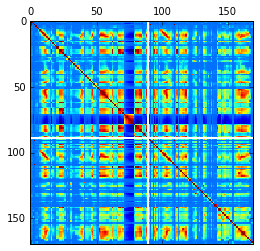

In [65]:
plt.matshow(imputed_train_x.corr())

&nbsp; iv. Pick ⌊ 170⌋ features with highest CV , and make scatter plots and box plots
 for them, similar to those on p. 129 of ISLR. Can you draw conclusions about significance of those features, just by the scatter plots? This does not mean that you will only use those features in the following questions. We picked them only for visualization.

In [5]:
top_13_idx = np.argsort(cv_list_2)[-13:]
print(top_13_idx)
top_13_values = [cv_list_2[i] for i in top_13_idx]
print(top_13_values)



[ 81  62  33 149 140 122 136 155   2 145   3 109  91]
[25818142.972403325, 25903749.04408517, 27802004.745328914, 31470952.60239216, 39249967.3794276, 43132202.3623074, 62233759.319309466, 175486814.19741464, 1676046902.6862977, 2002783628.0343413, 6442860221.366482, 6446413715.088709, 6456369192.341346]


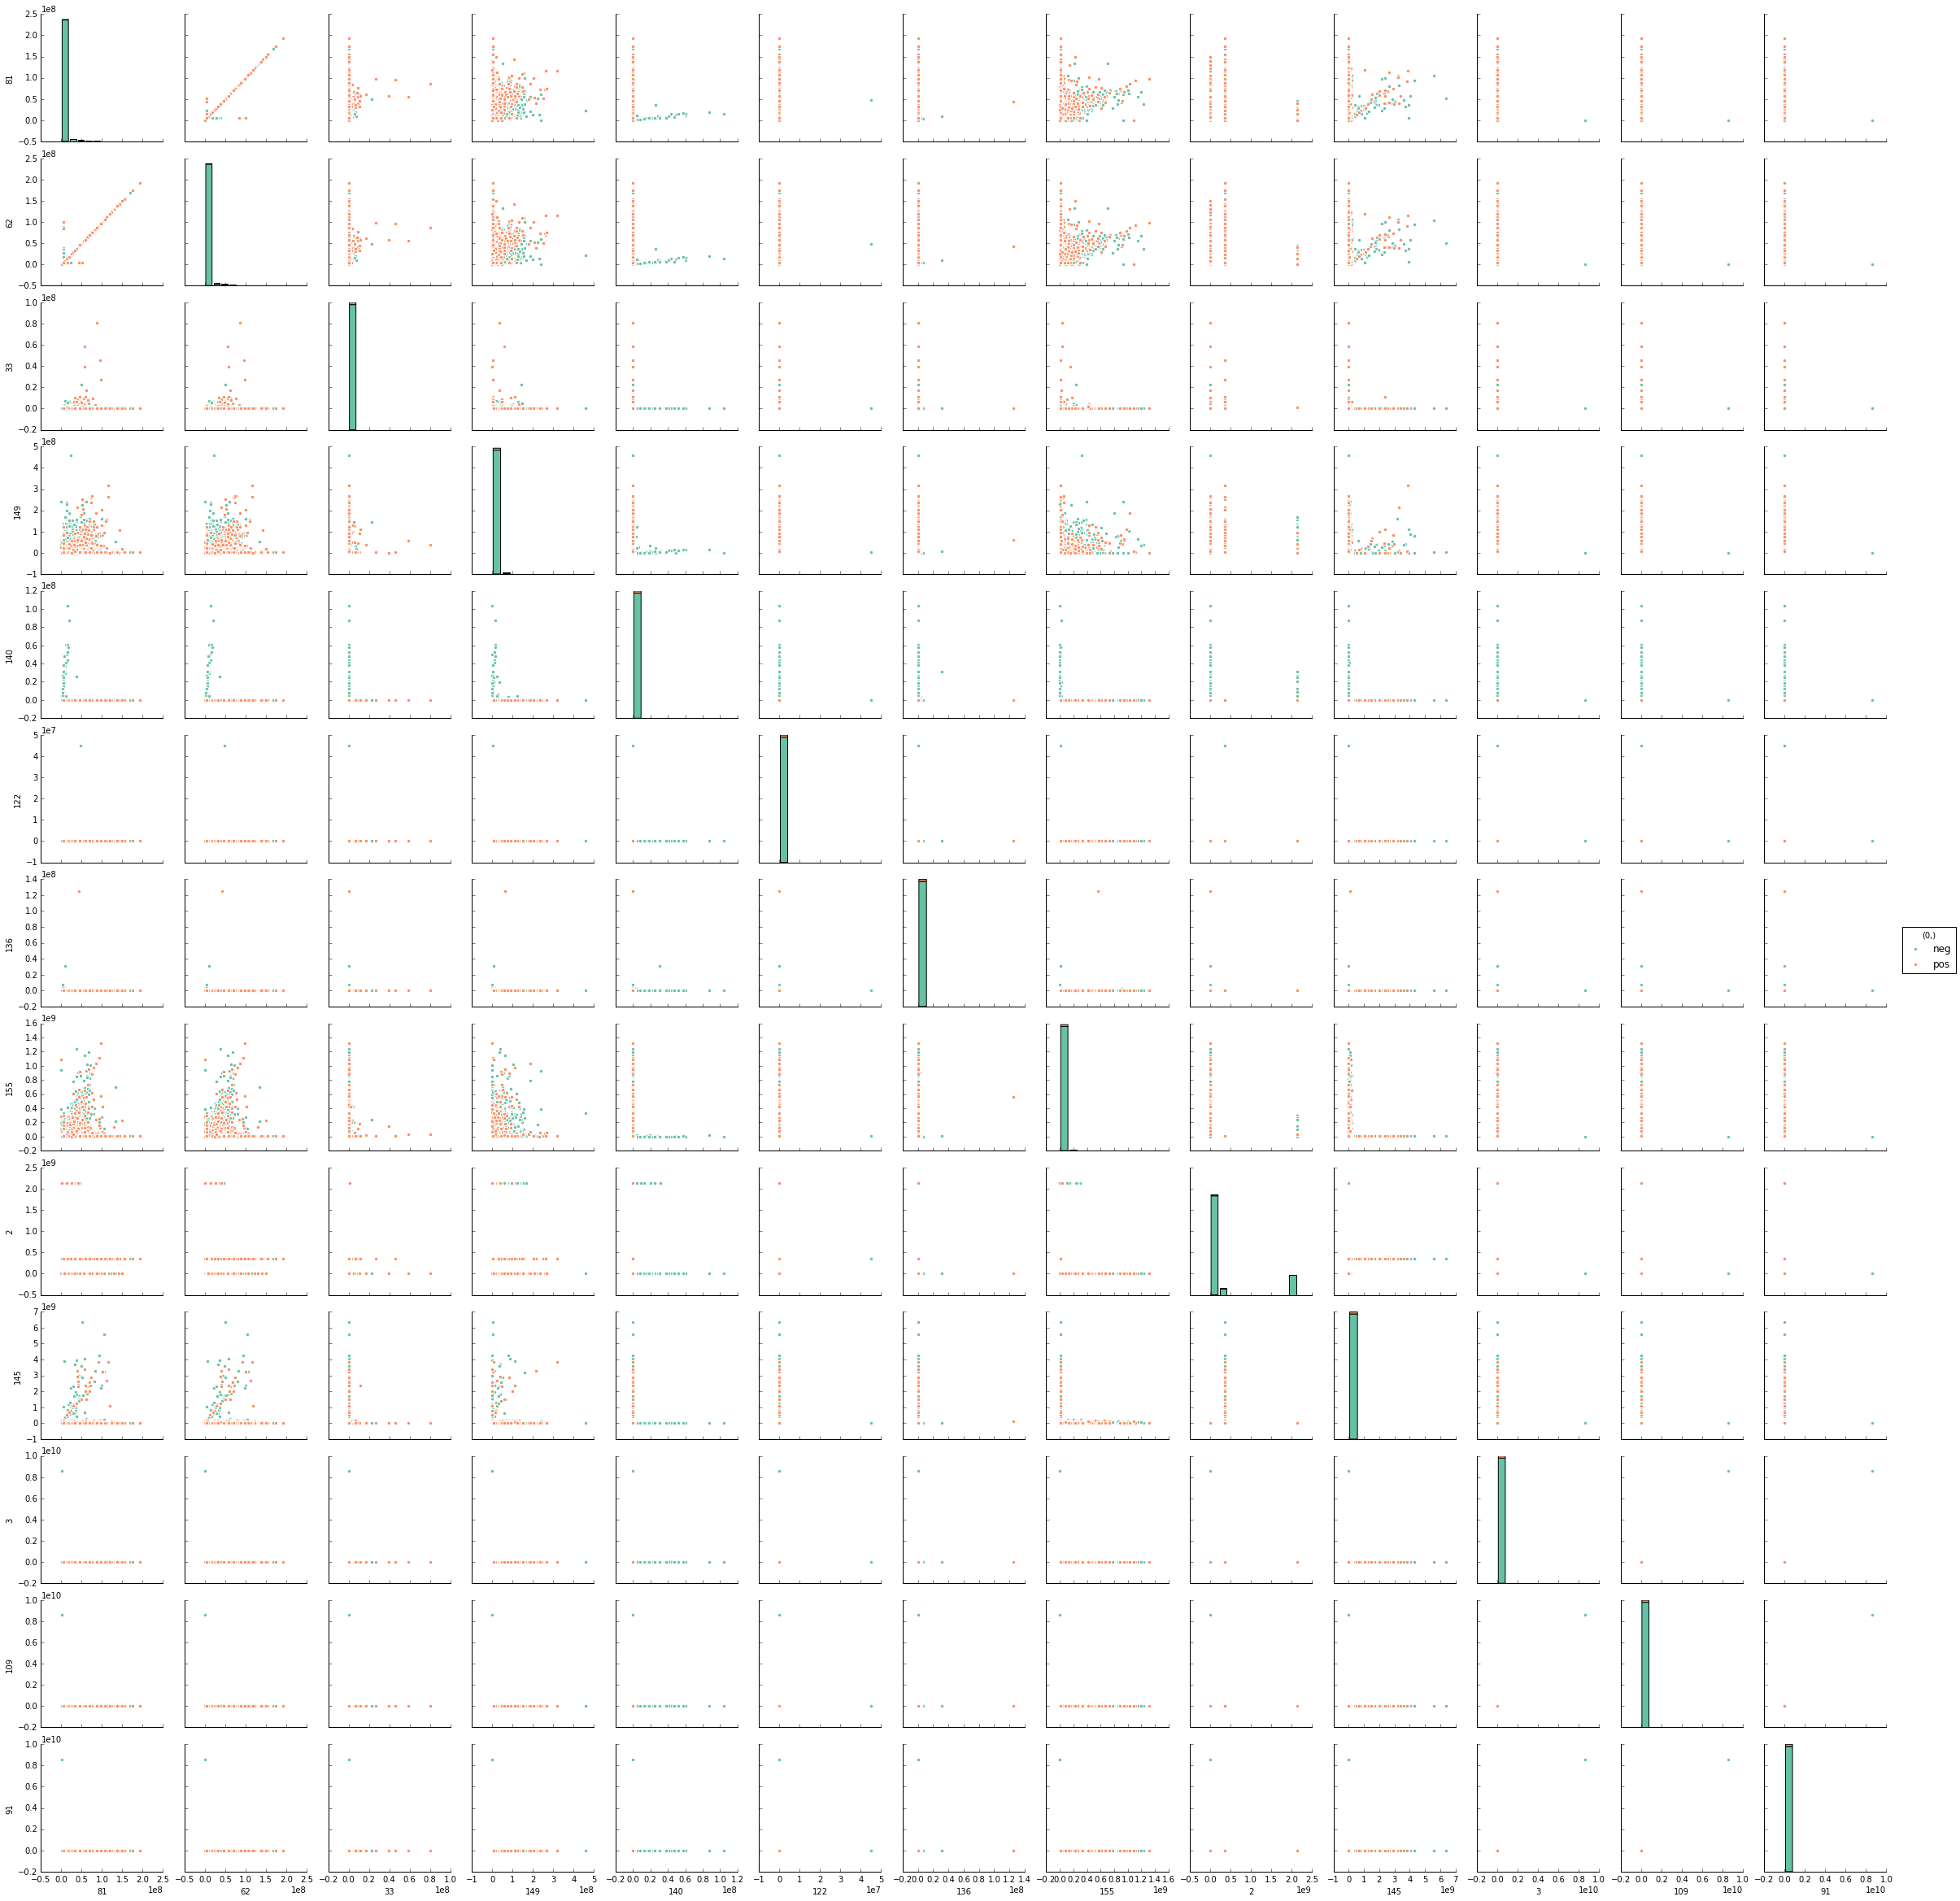

In [9]:
df_all_2 = pd.DataFrame()
for i in top_13_idx:
   
    df_all_2 = pd.concat([df_all_2,imputed_train_x[i]], axis = 1)
df_all_2 = pd.concat([df_all_2,train_data_y[0]], axis = 1)
sns.pairplot(df_all_2, kind="scatter", palette="Set2",hue = (0,))
plt.show()

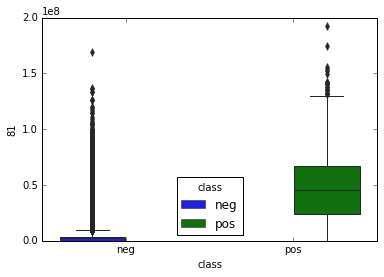

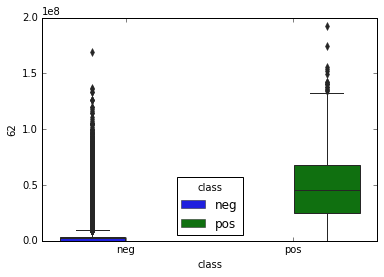

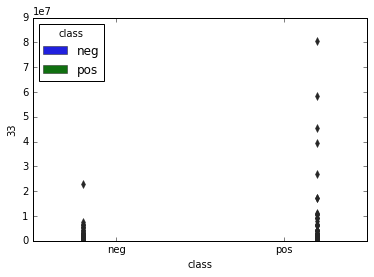

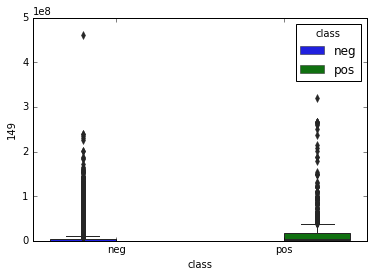

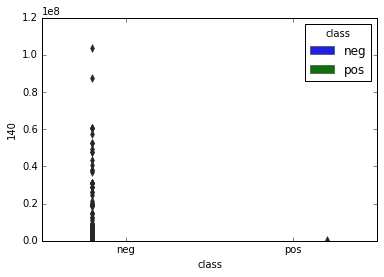

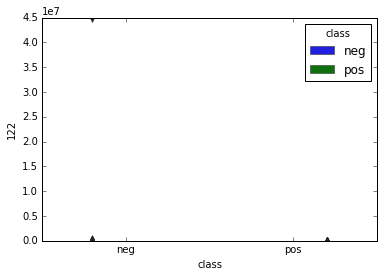

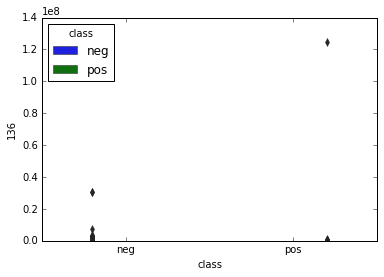

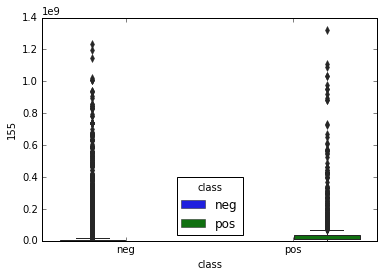

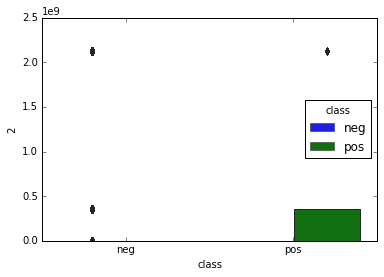

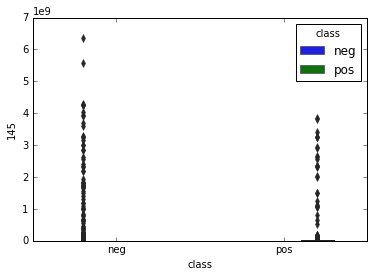

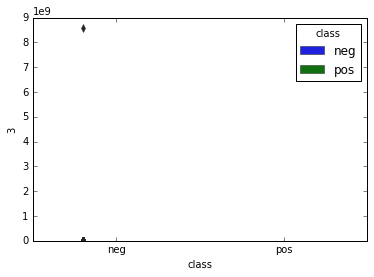

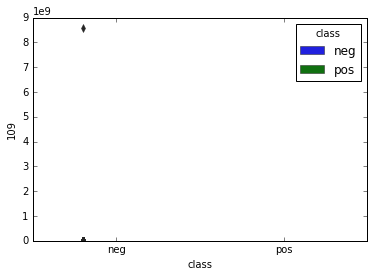

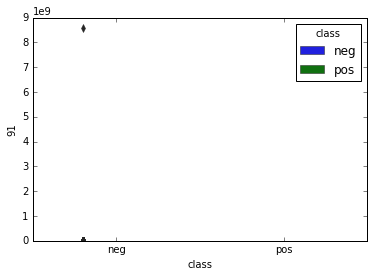

In [35]:
for i in top_13_idx:
    
    data_df_2 = pd.concat( [imputed_train_x[i], train_data_y['class']], axis=1,ignore_index=False)
    data_df_2.columns = [i,'class']
    sns.boxplot(data = data_df_2, x= "class", y = i, hue = "class")
    plt.show()



&nbsp; v. Determine the number of positive and negative data. Is this data set imbalanced?

In [25]:
neg_count = 0
pos_count = 0
for i in range(len(train_data_y)):
    if train_data_y[0][0].values[i][0] == 'neg':
        neg_count +=1
    else:
        pos_count +=1
print('the count of "neg" class is ')
print(neg_count)
print('the count of "pos" class is ')
print(pos_count)

the count of "neg" class is 
59000
the count of "pos" class is 
1000


The data set is imbalanced.

#### &nbsp; (c) Train a random forest to classify the data set. Do NOT compensate for class imbalance in the data set. Calculate the confusion matrix, ROC, AUC, and misclassification for training and test sets and report them (You may use pROC package). Calculate Out of Bag error estimate for your random forset and compare it to the test error

In [31]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini')
clf.fit(imputed_train_x, np.ravel(train_data_y))
pre = clf.predict(imputed_test_x)
score = clf.score(imputed_test_x,np.ravel(test_data_y))
from sklearn.metrics import confusion_matrix 
tn, fp, fn, tp = confusion_matrix(pre,test_data_y).ravel()#get the number of tn fp fn tp
print ('tn:'+str(tn))
print ('fp:'+str(fp))
print ('fn:'+str(fn))
print ('tp:'+str(tp))

#confusion matrix
print(confusion_matrix(pre,test_data_y))



tn:15602
fp:131
fn:23
tp:244
[[15602   131]
 [   23   244]]


In [33]:
print(pre)

['neg' 'neg' 'neg' ... 'neg' 'neg' 'neg']


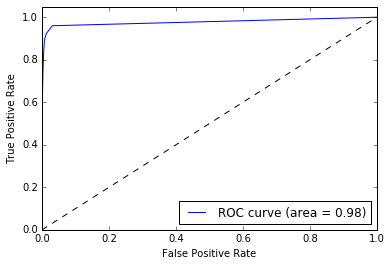

auc = 0.977244


In [40]:

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc
import statsmodels.api as sm
test_data_y.replace('neg', 0, inplace = True)
test_data_y.replace('pos', 1, inplace = True)
y_pred_rf = clf.predict_proba(imputed_test_x)[:, 1]

fpr_rf, tpr_rf, _ = roc_curve(test_data_y, y_pred_rf)
logit = auc(fpr_rf, tpr_rf)

#plot
plt.plot(fpr_rf,tpr_rf,label='ROC curve (area = %0.2f)'%logit)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.show()
print('auc = %f'%logit)



tn:58998
fp:32
fn:2
tp:968
[[58998    32]
 [    2   968]]


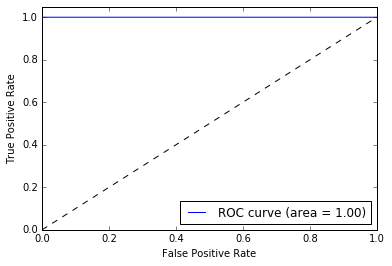

auc = 0.999989


In [41]:
pre_test = clf.predict(imputed_train_x)
score = clf.score(imputed_train_x,np.ravel(train_data_y))
from sklearn.metrics import confusion_matrix 
tn, fp, fn, tp = confusion_matrix(pre_test,train_data_y).ravel()#get the number of tn fp fn tp
print ('tn:'+str(tn))
print ('fp:'+str(fp))
print ('fn:'+str(fn))
print ('tp:'+str(tp))
#confusion matrix
print(confusion_matrix(pre_test,train_data_y))

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc
import statsmodels.api as sm
train_data_y.replace('neg', 0, inplace = True)
train_data_y.replace('pos', 1, inplace = True)
y_pred_rf = clf.predict_proba(imputed_train_x)[:, 1]
fpr_rf, tpr_rf, _ = roc_curve(train_data_y, y_pred_rf)
logit = auc(fpr_rf, tpr_rf)

#plot
plt.plot(fpr_rf,tpr_rf,label='ROC curve (area = %0.2f)'%logit)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.show()
print('auc = %f'%logit)




In [44]:
clf_oob = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',oob_score = True)
clf_oob.fit(imputed_train_x, np.ravel(train_data_y))
pre_oob = clf_oob.predict(imputed_test_x)
score_oob = clf_oob.score(imputed_test_x,np.ravel(test_data_y))

tn, fp, fn, tp = confusion_matrix(pre_oob,test_data_y).ravel()#get the number of tn fp fn tp
print ('tn:'+str(tn))
print ('fp:'+str(fp))
print ('fn:'+str(fn))
print ('tp:'+str(tp))
#confusion matrix
print(confusion_matrix(pre_oob,test_data_y))



tn:15608
fp:118
fn:17
tp:257
[[15608   118]
 [   17   257]]


when using OOB, the test error is (118+17)135, and the test error when not using it is 154.

&nbsp; d) Research how class imbalance is addressed in random forests. Compensate for class imbalance in your random forest and repeat 2c. Compare the results with those of 2c.

In [73]:
from sklearn.ensemble import RandomForestClassifier
#change class_weight into 'balanced' which means using the values 
#of y to automatically adjust weights inversely proportional to class frequencies in the input data as n_samples / (n_classes * np.bincount(y))

clf = RandomForestClassifier(bootstrap=True, class_weight='balanced', criterion='gini')
clf.fit(imputed_train_x, np.ravel(train_data_y))
pre = clf.predict(imputed_test_x)
score = clf.score(imputed_test_x,np.ravel(test_data_y))
from sklearn.metrics import confusion_matrix 
tn, fp, fn, tp = confusion_matrix(pre,test_data_y).ravel()#get the number of tn fp fn tp
print ('tn:'+str(tn))
print ('fp:'+str(fp))
print ('fn:'+str(fn))
print ('tp:'+str(tp))
#confusion matrix
print(confusion_matrix(pre,test_data_y))



tn:15612
fp:175
fn:13
tp:200
[[15612   175]
 [   13   200]]


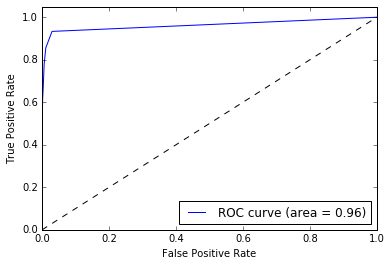

auc = 0.962578


In [74]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc
import statsmodels.api as sm


y_pred_rf = clf.predict_proba(imputed_test_x)[:, 1]

fpr_rf, tpr_rf, _ = roc_curve(test_data_y, y_pred_rf)
logit = auc(fpr_rf, tpr_rf)

#plot
plt.plot(fpr_rf,tpr_rf,label='ROC curve (area = %0.2f)'%logit)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.show()
print('auc = %f'%logit)

tn:59000
fp:49
fn:0
tp:951
[[59000    49]
 [    0   951]]


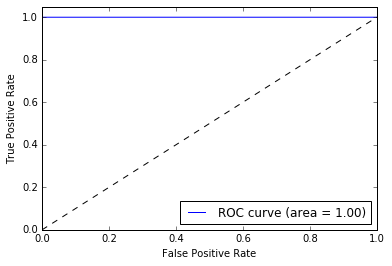

auc = 0.999995


In [75]:
pre_test = clf.predict(imputed_train_x)
score = clf.score(imputed_train_x,np.ravel(train_data_y))
from sklearn.metrics import confusion_matrix 
tn, fp, fn, tp = confusion_matrix(pre_test,train_data_y).ravel()#get the number of tn fp fn tp
print ('tn:'+str(tn))
print ('fp:'+str(fp))
print ('fn:'+str(fn))
print ('tp:'+str(tp))
#confusion matrix
print(confusion_matrix(pre_test,train_data_y))


from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc
import statsmodels.api as sm


y_pred_rf = clf.predict_proba(imputed_train_x)[:, 1]

fpr_rf, tpr_rf, _ = roc_curve(train_data_y, y_pred_rf)
logit = auc(fpr_rf, tpr_rf)

#plot
plt.plot(fpr_rf,tpr_rf,label='ROC curve (area = %0.2f)'%logit)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.show()
print('auc = %f'%logit)


When I tried to adjust the imbalanced class, and do random forest again. The result seemed to be less accuracy. The error rate becomed lager, and the area under curve(auc) is smaller too.

#### &nbsp;(e) Model Trees
&nbsp;In the case of a univariate tree, only one input dimension is used at a tree split. In a multivariate tree, or model tree, at a decision node all input dimensions can be used and thus it is more general. In univariate classification trees, majority polling is used at each node to determine the split of that node as the decision rule. In model trees, a (linear) model that relies on all of the variables is used to determine the split of that node (i.e. instead of using Xj > s as the decision rule, one has  j βjXj > s. as the decision rule). Alternatively, in a regression tree, instead of using average in the region associated with each node, a linear regression model is used to determine the value associated with that node.
One of the methods that can be used at each node is Logistic Regression. One can use scikit learn to call Weka6 to train Logistic Model Trees for classification. Train Logistic Model Trees for the APS data set without compensation for class imbalance. Use one of 5 fold, 10 fold, and leave-one-out cross validation methods to estimate the error of your trained model and compare it with the test error. Report the Confusion Matrix, ROC, and AUC for training and test sets.

In [59]:
df_train_csv = pd.DataFrame()
train_data_y.columns = ['class']
df_train_csv = pd.concat([imputed_train_x,train_data_y], axis = 1)

df_test_csv = pd.DataFrame()
test_data_y.columns = ['class']
df_test_csv = pd.concat([imputed_test_x,test_data_y], axis = 1)



In [60]:
df_train_csv.to_csv('train.csv',index=False)
df_test_csv.to_csv('test.csv',index=False)

In [16]:
from weka.core.converters import Loader, Saver 
import weka.core.jvm as jvm 
from weka.classifiers import Classifier, Evaluation 

#starting JVM 
jvm.start() 

DEBUG:weka.core.jvm:Adding bundled jars
DEBUG:weka.core.jvm:Classpath=['/Users/yuxinliu/anaconda3/lib/python3.6/site-packages/javabridge/jars/rhino-1.7R4.jar', '/Users/yuxinliu/anaconda3/lib/python3.6/site-packages/javabridge/jars/runnablequeue.jar', '/Users/yuxinliu/anaconda3/lib/python3.6/site-packages/javabridge/jars/cpython.jar', '/Users/yuxinliu/anaconda3/lib/python3.6/site-packages/python_weka_wrapper3-0.1.5-py3.6.egg/weka/lib/python-weka-wrapper.jar', '/Users/yuxinliu/anaconda3/lib/python3.6/site-packages/python_weka_wrapper3-0.1.5-py3.6.egg/weka/lib/weka.jar', '/Users/yuxinliu/anaconda3/lib/python3.6/site-packages/python_weka_wrapper3-0.1.5-py3.6.egg/weka/lib/python-weka-wrapper.jar', '/Users/yuxinliu/anaconda3/lib/python3.6/site-packages/python_weka_wrapper3-0.1.5-py3.6.egg/weka/lib/weka.jar']
DEBUG:weka.core.jvm:MaxHeapSize=default
DEBUG:weka.core.jvm:Package support disabled


0.00815
[[58828.   172.]
 [  317.   683.]]


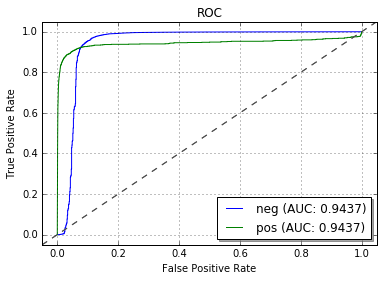

In [17]:
#train error withe the right way CV
from weka.classifiers import Evaluation
from weka.core.classes import Random
import weka.plot.classifiers as plcls
import weka.core.serialization as serialization
from weka.classifiers import Classifier
from weka.core.converters import Loader
loader = Loader(classname="weka.core.converters.CSVLoader")
train_ex = loader.load_file("train.csv")
test_ex = loader.load_file("test.csv")
train_ex.class_is_last()
test_ex.class_is_last()
LogisticMT_ex = Classifier('weka.classifiers.trees.LMT')

#LogisticMT_ex.build_classifier(train_ex)
eva_ex = Evaluation(train_ex)
eva_ex.crossvalidate_model(LogisticMT_ex, train_ex, 5, Random(1))
print(eva_ex.error_rate)
print(eva_ex.confusion_matrix)
plcls.plot_roc(eva_ex, class_index = [0,1], wait = True)

0.009625
[[15579.    46.]
 [  108.   267.]]


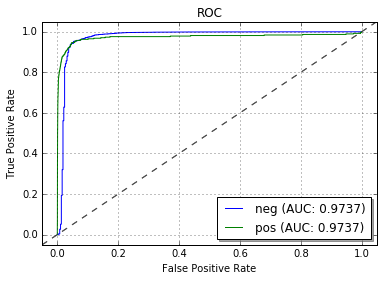

In [18]:
#test error and roc curve with the right-way CV
LMT_test = Classifier('weka.classifiers.trees.LMT')
LMT_test.build_classifier(train_ex)
eva_test_ex = Evaluation(train_ex)
eva_test_ex.test_model(LMT_test, test_ex)


#LogisticMT = Classifier('weka.classifiers.trees.LMT')

print(eva_test_ex.error_rate)
print(eva_test_ex.confusion_matrix)
plcls.plot_roc(eva_test_ex, class_index = [0,1], wait = True)

In [62]:
LogisticMT = Classifier('weka.classifiers.trees.LMT')
LogisticMT.build_classifier(train)
print(LogisticMT)


Logistic model tree 
------------------

7 <= 986
|   25 <= 2197792
|   |   8 <= 22938: LM_1:144/576 (57312)
|   |   8 > 22938: LM_2:144/576 (313)
|   25 > 2197792
|   |   34 <= 17640
|   |   |   143 <= 709632: LM_3:144/720 (1673)
|   |   |   143 > 709632: LM_4:144/720 (74)
|   |   34 > 17640: LM_5:144/576 (92)
7 > 986: LM_6:144/288 (536)

Number of Leaves  : 	6

Size of the Tree : 	11



LM_1:
Class neg :
3.79 + 
[0] * -0 +
[1] * -0.02 +
[4] * -0 +
[5] * 0    +
[6] * 0    +
[7] * -0 +
[8] * 0    +
[26] * -0.01 +
[27] * -0 +
[28] * -0 +
[29] * -0 +
[30] * -0 +
[31] * 0    +
[41] * -0 +
[43] * -0 +
[50] * 0    +
[63] * -0 +
[64] * 0    +
[65] * 0    +
[66] * 0    +
[78] * -0 +
[79] * -0 +
[84] * -0 +
[86] * -0 +
[92] * -0 +
[97] * 0    +
[98] * -0 +
[110] * 0    +
[113] * 0    +
[120] * 0    +
[121] * 0    +
[123] * 0    +
[124] * 0    +
[127] * -0 +
[128] * -0 +
[129] * -0 +
[130] * 0.01 +
[132] * 0    +
[133] * -0 +
[135] * -0 +
[143] * -0 +
[144] * 0    +
[148] * -0 +
[152] * 0    +


&nbsp; (f) Use SMOTE (Synthetic Minority Over-sampling Technique) to pre-process your data to compensate for class imbalance. Train a Logistic Model Tree using the pre-processed data and repeat 2e. Do not forget that there is a right and a wrong way of cross validation here. Compare the uncompensated case with SMOTE.


In [12]:

from imblearn.over_sampling import SMOTE
smo1 = SMOTE(k_neighbors =2)
smo2 = SMOTE(k_neighbors =2)
train_x_res, train_y_res = smo1.fit_sample(imputed_train_x, train_data_y)
test_x_res, test_y_res = smo2.fit_sample(imputed_test_x, test_data_y)

train_x_smote=pd.DataFrame(train_x_res)
train_y_smote=pd.DataFrame(train_y_res)
test_x_smote=pd.DataFrame(test_x_res)
test_y_smote=pd.DataFrame(test_y_res)

df_train_smote = pd.DataFrame()

train_y_smote.columns = ['class']
df_train_smote = pd.concat([train_x_smote,train_y_smote], axis = 1)

df_test_smote = pd.DataFrame()
test_y_smote.columns = ['class']
df_test_smote = pd.concat([test_x_smote,test_y_smote], axis = 1)

df_train_smote.to_csv('train_smote.csv',index=False)
df_test_smote.to_csv('test_smote.csv',index=False)

0.015966101694915254
[[57879.  1121.]
 [  763. 58237.]]


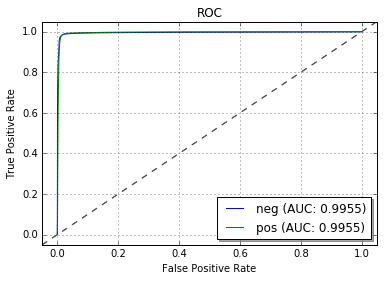

In [13]:
#right way CV(smote)
loader = Loader(classname="weka.core.converters.CSVLoader")
train_smote = loader.load_file("train_smote.csv")
test_smote = loader.load_file("test_smote.csv")
train_smote.class_is_last()
test_smote.class_is_last()
LogisticMT_smote = Classifier('weka.classifiers.trees.LMT')

#LogisticMT_smote.build_classifier(train_smote)
eva_smote = Evaluation(train_smote)
eva_smote.crossvalidate_model(LogisticMT_smote, train_smote, 5, Random(1))
print(eva_smote.error_rate)
print(eva_smote.confusion_matrix)
plcls.plot_roc(eva_smote, class_index = [0,1], wait = True)

0.072928
[[15375.   250.]
 [ 2029. 13596.]]


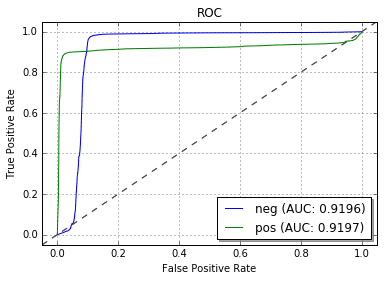

In [19]:
#test error and roc curve with the right-way CV
LMT_test_smote = Classifier('weka.classifiers.trees.LMT')
LMT_test_smote.build_classifier(train_smote)
eva_test_ex_smote = Evaluation(train_smote)
eva_test_ex_smote.test_model(LMT_test_smote, test_smote)

#LogisticMT = Classifier('weka.classifiers.trees.LMT')

print(eva_test_ex_smote.error_rate)
print(eva_test_ex_smote.confusion_matrix)
plcls.plot_roc(eva_test_ex_smote, class_index = [0,1], wait = True)

From the result, we can conclude that the test error is bigger but the train error is smaller.

In [15]:
jvm.stop()